Band calculation in 1D optical lattice
==

Parameters
--

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

n = 15
m = 20
s = 3 #potential depth [ER]

Hamiltonian
--

In [2]:
Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.linspace(-1, 1,2*m+1)
E = np.zeros([q.size, Nsite])
tmp = np.eye(Nsite-1)
Htmp = np.zeros([Nsite, Nsite])
Htmp[0:Nsite-1, 1:Nsite] += -s/4 * tmp
Htmp[1:Nsite, 0:Nsite-1] += -s/4 * tmp

C = np.zeros([Nsite, q.size, Nsite])
C0 = np.zeros([Nsite,q.size])
for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 + s/2
        
        E0, P = np.linalg.eig(H)
        C0[:,i_q] = P[:,np.argmin(E0)]
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        
        E[i_q, :], P = map(list, zip(*rearrangedEvalsVecs))
        C[:, i_q, :] = np.array(P)
Energy = E.T

Plot band structure
--

Text(0.5, 1.0, '$s$=3.00[$E_R$]')

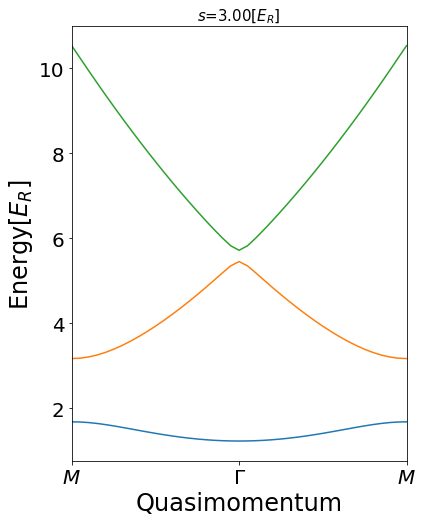

In [6]:
plt.figure(figsize=[6,8])
list(map(lambda x: plt.plot(q,E[:,x]), range(3)))
plt.xlim(-1,1)
plt.xlabel('Quasimomentum', fontsize=24)
plt.ylabel('Energy[$E_R$]', fontsize=24)
plt.xticks([-1,0,1],[r"$M$",r"$\Gamma$", r"$M$"], fontsize="20")
plt.yticks(fontsize="20")
plt.title(r'$s$={:.2f}[$E_R$]'.format(s), fontsize=15)
# %%